<a href="https://colab.research.google.com/github/aizazaziz/aizazaziz/blob/main/Weather_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# URL of the dataset on Zenodo
url = 'https://zenodo.org/record/4770937/files/weather_prediction_dataset.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of dataset
print(df.head())

       DATE  MONTH  BASEL_cloud_cover  BASEL_humidity  BASEL_pressure  \
0  20000101      1                  8            0.89          1.0286   
1  20000102      1                  8            0.87          1.0318   
2  20000103      1                  5            0.81          1.0314   
3  20000104      1                  7            0.79          1.0262   
4  20000105      1                  5            0.90          1.0246   

   BASEL_global_radiation  BASEL_precipitation  BASEL_sunshine  \
0                    0.20                 0.03             0.0   
1                    0.25                 0.00             0.0   
2                    0.50                 0.00             3.7   
3                    0.63                 0.35             6.9   
4                    0.51                 0.07             3.7   

   BASEL_temp_mean  BASEL_temp_min  ...  STOCKHOLM_temp_min  \
0              2.9             1.6  ...                -9.3   
1              3.6             2.7  ..

In [40]:
df.info()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB
               DATE        MONTH  BASEL_cloud_cover  BASEL_humidity  \
count  3.654000e+03  3654.000000        3654.000000     3654.000000   
mean   2.004568e+07     6.520799           5.418446        0.745107   
std    2.874287e+04     3.450083           2.325497        0.107788   
min    2.000010e+07     1.000000           0.000000        0.380000   
25%    2.002070e+07     4.000000           4.000000        0.670000   
50%    2.004567e+07     7.000000           6.000000        0.760000   
75%    2.007070e+07    10.000000           7.000000        0.830000   
max    2.010010e+07    12.000000           8.000000        0.980000   

       BASEL_pressure  BASEL_global_radiation  BASEL_precipitation  \
count     3654.000000             3654.000000          3654.000000   
mean         1.017876                1.330380   

In [41]:
df.isnull().sum()


,0
DATE,0
MONTH,0
BASEL_cloud_cover,0
BASEL_humidity,0
BASEL_pressure,0
...,...
TOURS_global_radiation,0
TOURS_precipitation,0
TOURS_temp_mean,0
TOURS_temp_min,0


In [45]:
dt = df.dropna()

In [46]:
dt = pd.get_dummies(dt, drop_first=True)

In [49]:
X = dt.drop("BASEL_temp_mean", axis=1)
y = dt["BASEL_temp_mean"]

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [57]:
from sklearn.linear_model import LinearRegression

mod = LinearRegression()
mod.fit(X_train, y_train)

LinearRegression()

In [64]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = mod.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error ,{mse} ")

r2 = r2_score(y_test, y_pred)
print(f"R Squared score ,{r2} ")

Mean Squared Error ,0.19665724668463544 
R Squared score ,0.9963551645217823 


In [ ]:
model_mse = mean_squared_error(y_test, y_pred)

In [62]:
mod.score(X_test, y_test)


0.9963551645217823

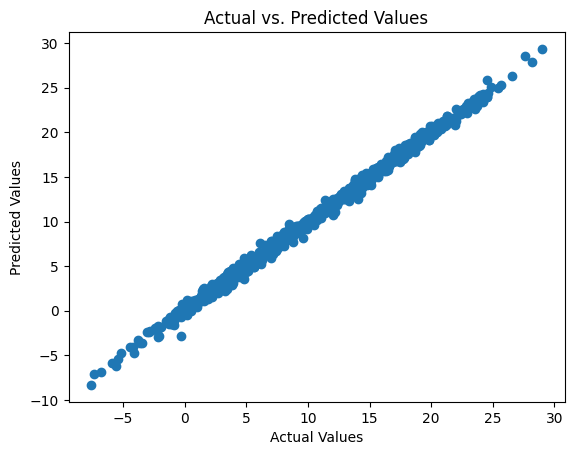

In [65]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()